<a href="https://colab.research.google.com/github/drdr1212/AIpython/blob/master/250523_%EC%9B%90%EC%98%88%ED%95%99%EA%B3%BC_%EC%84%9C%EC%B0%BD%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import the pandas library
import pandas

# List files in the sample_data directory to identify the correct CSV file name
!ls /content/sample_data

# Replace 'your_csv_file_name.csv' with the actual name of the CSV file from the !ls output
file_path = '/content/sample_data/your_csv_file_name.csv' # <--- Change this to the actual filename

df = pandas.read_csv(file_path)

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/your_csv_file_name.csv'

In [5]:
# Import the pandas library
import pandas

# List files in the sample_data directory to identify the correct CSV file name
# Look at the output of this command to find the correct CSV filename.
!ls /content/sample_data

# Replace 'your_csv_file_name.csv' with the actual name of the CSV file from the !ls output
# For example, if the output of !ls showed 'california_housing_train.csv',
# you would change the line below to:
# file_path = '/content/sample_data/california_housing_train.csv'
file_path = '/content/sample_data/california_housing_train.csv' # <--- Change this to the actual filename you found

df = pandas.read_csv(file_path)

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [7]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"총 붓꽃 데이터 개수: {num_rows}개")
print(f"총 정보(열) 개수: {num_cols}개")

총 붓꽃 데이터 개수: 17000개
총 정보(열) 개수: 9개


In [8]:
# 각 열의 이름을 확인합니다.
column_names = df.columns

print("각 열의 이름:")
# 각 열 이름을 반복하여 출력합니다.
for col_name in column_names:
    print(col_name)

각 열의 이름:
longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value


In [9]:
# 데이터프레임의 기본 정보 확인
# - 각 열의 Non-Null 개수를 통해 비어있는 값(null)이 있는지 확인할 수 있습니다.
#   Non-Null 개수가 전체 행 수(df.shape[0])보다 작으면 해당 열에 비어있는 값이 있다는 의미입니다.
# - 각 열의 dtype을 통해 숫자로 된 열인지 확인할 수 있습니다. (예: float64, int64 등)
print("--- 데이터프레임 기본 정보 ---")
df.info()

# info() 출력 결과를 보고 숫자로 된 열의 개수를 직접 확인해야 합니다.
# 또는 데이터 타입을 기준으로 필터링하여 숫자로 된 열의 개수를 세는 코드를 추가할 수도 있습니다.
# 예를 들어, 숫자 타입 열의 개수를 자동 계산하는 코드는 다음과 같습니다.
# numeric_cols = df.select_dtypes(include=['number'])
# num_numeric_cols = numeric_cols.shape[1]
# print(f"\n숫자로 된 열 개수: {num_numeric_cols}개")

--- 데이터프레임 기본 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [12]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
# 데이터프레임 이름은 '붓꽃_df'라고 정했습니다.
# 데이터는 'data' 부분에 있고, 각 열의 이름은 'feature_names' 부분에 있습니다.
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
# 종류는 'target' 부분에 숫자 형태로 저장되어 있고, 실제 이름은 'target_names'에 있습니다.
# 숫자를 실제 이름으로 바꿔서 추가합니다.
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

# 이제 '붓꽃_df' 데이터프레임에 우리가 필요한 붓꽃 데이터가 제대로 들어있습니다.
# 이제 간단한 계산을 해봅시다.

#-----------------------------------------------------------
# 문제 1: 'sepal length (cm)' (꽃받침 길이) 열의 평균 계산하기
# scikit-learn에서 가져온 열 이름은 약간 다를 수 있습니다.
# '붓꽃_df.columns'를 실행해서 정확한 열 이름을 확인해보는 것이 좋습니다.
# 여기서는 'sepal length (cm)'가 정확한 이름입니다.
꽃받침_길이_평균 = 붓꽃_df['sepal length (cm)'].mean()

# 문제 2: 'petal width (cm)' (꽃잎 너비) 열의 최댓값 계산하기
# 여기서는 'petal width (cm)'가 정확한 이름입니다.
꽃잎_너비_최대 = 붓꽃_df['petal width (cm)'].max()

# 계산 결과 출력
print(f"꽃받침 길이의 평균: {꽃받침_길이_평균:.2f}") # 소수점 둘째 자리까지 출력
print(f"꽃잎 너비의 최댓값: {꽃잎_너비_최대:.2f}") # 소수점 둘째 자리까지 출력

# 데이터프레임의 열 이름 확인 (필요하다면 주석을 풀고 실행해보세요)
# print("데이터프레임의 열 이름:")
# for col in 붓꽃_df.columns:
#     print(col)

꽃받침 길이의 평균: 5.84
꽃잎 너비의 최댓값: 2.50


In [13]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 6: 붓꽃 종류별로 개수 세기

# '종류' 열에 있는 각 값(붓꽃 종류)이 몇 번씩 나오는지 셉니다.
종류별_개수 = 붓꽃_df['종류'].value_counts()

# 결과 출력
print("--- 붓꽃 종류별 개수 ---")
print(종류별_개수)

# 세 종류의 개수가 같은지 확인
# value_counts() 결과는 Series 형태로, 모든 값이 동일한지 확인하려면 .nunique()를 사용하거나 직접 비교할 수 있습니다.
# 여기서는 간단하게 모든 값이 동일한지 확인합니다.
if 종류별_개수.nunique() == 1:
    print("\n세 종류의 붓꽃 개수가 모두 같습니다.")
else:
    print("\n세 종류의 붓꽃 개수가 같지 않습니다.")

# 참고: 붓꽃 데이터셋은 기본적으로 각 종류별로 50개씩 균등하게 제공됩니다.
# 그래서 보통은 개수가 같다고 나올 것입니다.

--- 붓꽃 종류별 개수 ---
종류
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

세 종류의 붓꽃 개수가 모두 같습니다.


In [14]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 7: 특정 조건의 데이터 찾기

# 문제 7-1: 꽃잎 길이가 2.0보다 큰 데이터는 몇 개인지 찾아보세요
# 'petal length (cm)' 열의 값이 2.0보다 큰 행들만 선택합니다.
조건1_필터링된_데이터 = 붓꽃_df[붓꽃_df['petal length (cm)'] > 2.0]

# 필터링된 데이터의 개수를 셉니다. (행의 개수)
조건1_개수 = len(조건1_필터링된_데이터) # 또는 조건1_필터링된_데이터.shape[0] 사용 가능

print(f"꽃잎 길이가 2.0cm보다 큰 붓꽃 데이터 개수: {조건1_개수}개")

# 문제 7-2: 꽃받침 너비가 3.5보다 큰 데이터를 찾아보세요
# 'sepal width (cm)' 열의 값이 3.5보다 큰 행들만 선택합니다.
조건2_필터링된_데이터 = 붓꽃_df[붓꽃_df['sepal width (cm)'] > 3.5]

# 필터링된 데이터의 개수를 셉니다.
조건2_개수 = len(조건2_필터링된_데이터)

print(f"꽃받침 너비가 3.5cm보다 큰 붓꽃 데이터 개수: {조건2_개수}개")

# 참고: 필터링된 데이터 자체를 보고 싶다면 print(조건1_필터링된_데이터) 와 같이 출력할 수 있습니다.

꽃잎 길이가 2.0cm보다 큰 붓꽃 데이터 개수: 100개
꽃받침 너비가 3.5cm보다 큰 붓꽃 데이터 개수: 19개


In [16]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 8: 특정 붓꽃 종류만 보기

# 문제 8-1: 'versicolor' 종류만 골라서 평균 꽃잎 길이를 구해보세요
# '종류' 열의 값이 'versicolor'인 행들만 선택합니다.
versicolor_데이터 = 붓꽃_df[붓꽃_df['종류'] == 'versicolor']

# 선택된 versicolor 데이터에서 'petal length (cm)' 열의 평균을 계산합니다.
versicolor_꽃잎_길이_평균 = versicolor_데이터['petal length (cm)'].mean()

print(f"'versicolor' 종류의 평균 꽃잎 길이: {versicolor_꽃잎_길이_평균:.2f} cm") # 소수점 둘째 자리까지 출력

# 문제 8-2: 'virginica' 종류의 최대 꽃받침 너비를 찾아보세요
# '종류' 열의 값이 'virginica'인 행들만 선택합니다.
virginica_데이터 = 붓꽃_df[붓꽃_df['종류'] == 'virginica']

# 선택된 virginica 데이터에서 'sepal width (cm)' 열의 최댓값을 계산합니다.
virginica_꽃받침_너비_최대 = virginica_데이터['sepal width (cm)'].max()

print(f"'virginica' 종류의 최대 꽃받침 너비: {virginica_꽃받침_너비_최대:.2f} cm") # 소수점 둘째 자리까지 출력

# 참고: 여기서 사용된 붓꽃 종류 이름은 'setosa', 'versicolor', 'virginica' 입니다.
# 만약 다른 이름을 사용하셨다면 (예: 'Iris-versicolor'), 실제 데이터의 '종류' 열에 있는 이름을 확인하고 사용해야 합니다.
# 붓꽃_df['종류'].unique() 를 실행해서 실제 데이터에 있는 종류 이름을 확인할 수 있습니다.

'versicolor' 종류의 평균 꽃잎 길이: 4.26 cm
'virginica' 종류의 최대 꽃받침 너비: 3.80 cm


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

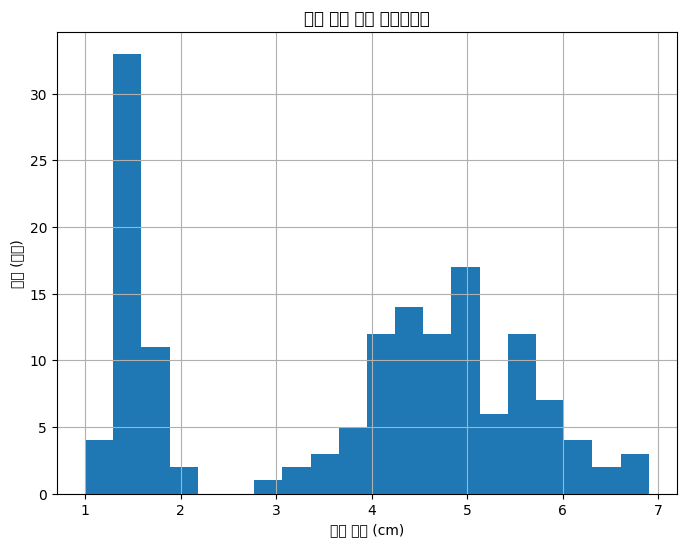

In [17]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 그래프를 그리기 위한 matplotlib.pyplot 라이브러리 불러오기
# 보통 plt라는 별명으로 사용합니다.
import matplotlib.pyplot as plt

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 9: 첫 번째 그래프 그리기

# 'petal length (cm)' (꽃잎 길이) 열의 히스토그램 그리기
# 데이터프레임의 특정 열을 선택한 후 .hist() 함수를 호출하면 히스토그램을 그릴 수 있습니다.
plt.figure(figsize=(8, 6)) # 그래프 크기 설정 (선택 사항)
붓꽃_df['petal length (cm)'].hist(bins=20) # 히스토그램 그리기, bins는 막대의 개수입니다.

# 그래프 제목 설정
plt.title('꽃잎 길이 분포 히스토그램')

# x축 이름 설정
plt.xlabel('꽃잎 길이 (cm)')

# y축 이름 설정
plt.ylabel('개수 (빈도)')

# 그래프 보여주기
plt.show()

# 그래프를 보고 어떤 구간에 데이터가 가장 많은지 관찰하세요.
# 보통 히스토그램에서 가장 높게 솟아 있는 막대가 있는 구간에 데이터가 가장 많습니다.
# 예를 들어, 막대가 1~2cm 구간에 높게 있다면, 꽃잎 길이가 1cm에서 2cm 사이인 붓꽃이 가장 많다는 뜻입니다.
# 실제 붓꽃 데이터는 두 개의 주요 그룹으로 나뉘는 경향이 있습니다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

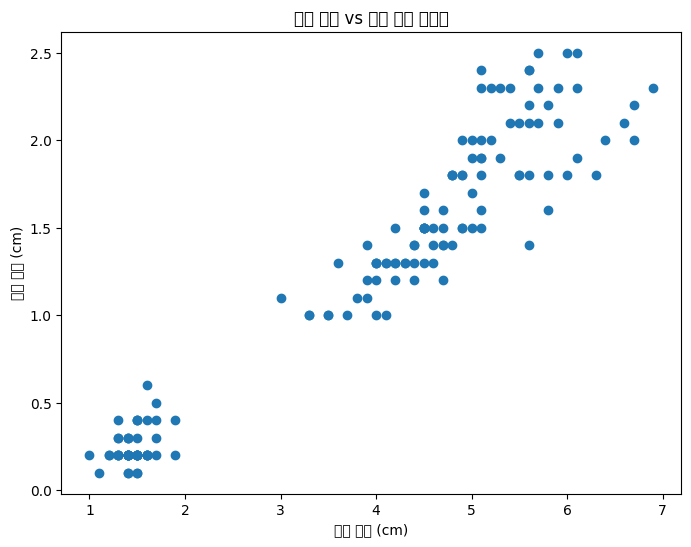

In [18]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 그래프를 그리기 위한 matplotlib.pyplot 라이브러리 불러오기
# 보통 plt라는 별명으로 사용합니다.
import matplotlib.pyplot as plt

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 10: 산점도 그리기

# 'petal length (cm)' (꽃잎 길이)와 'petal width (cm)' (꽃잎 너비)의 산점도 그리기
# 각 점은 하나의 붓꽃 데이터를 나타냅니다.
# x축은 꽃잎 길이, y축은 꽃잎 너비로 설정하여 점을 그립니다.
plt.figure(figsize=(8, 6)) # 그래프 크기 설정 (선택 사항)

# plt.scatter(x축 데이터, y축 데이터)
# 여기서는 꽃잎 길이를 x축, 꽃잎 너비를 y축으로 사용합니다.
plt.scatter(붓꽃_df['petal length (cm)'], 붓꽃_df['petal width (cm)'])

# 그래프 제목 설정
plt.title('꽃잎 길이 vs 꽃잎 너비 산점도')

# x축 이름 설정
plt.xlabel('꽃잎 길이 (cm)')

# y축 이름 설정
plt.ylabel('꽃잎 너비 (cm)')

# 그래프 보여주기
plt.show()

# 그래프를 보고 점들이 어떤 패턴을 보이는지 관찰하세요.
# 만약 점들이 오른쪽 위로 갈수록 밀집되어 있다면, 길이가 길어질수록 너비도 넓어지는 경향이 있다고 볼 수 있습니다.
# 붓꽃 데이터에서는 이 두 특성 사이에 강한 양의 상관관계가 나타나는 것을 볼 수 있습니다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48531 (\N{HANGUL SYLLABLE BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

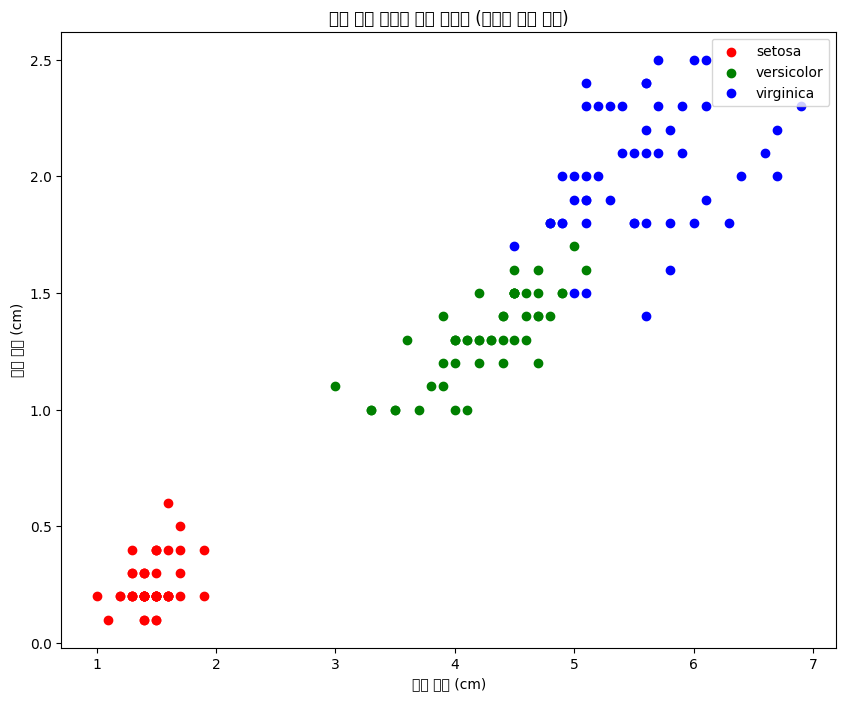

In [19]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 그래프를 그리기 위한 matplotlib.pyplot 라이브러리 불러오기
# 보통 plt라는 별명으로 사용합니다.
import matplotlib.pyplot as plt

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 11: 붓꽃 종류별로 다른 색깔로 산점도 그리기

# 'petal length (cm)' (꽃잎 길이)와 'petal width (cm)' (꽃잎 너비)의 산점도를
# 붓꽃 종류별로 다른 색깔로 그립니다.

plt.figure(figsize=(10, 8)) # 그래프 크기 설정

# 각 붓꽃 종류를 순회하며 해당 종류의 데이터만 선택하여 다른 색으로 산점도 그리기
# 붓꽃 종류 이름들을 가져옵니다.
붓꽃_종류_목록 = 붓꽃_df['종류'].unique()
색깔_목록 = ['red', 'green', 'blue'] # 각 종류에 사용할 색깔 목록

for i, 종류_이름 in enumerate(붓꽃_종류_목록):
    # 현재 종류 이름에 해당하는 데이터만 필터링합니다.
    해당_종류_데이터 = 붓꽃_df[붓꽃_df['종류'] == 종류_이름]

    # 해당 종류의 데이터에 대해 산점도를 그립니다.
    # x축은 꽃잎 길이, y축은 꽃잎 너비
    # color는 위에서 정한 색깔 목록에서 현재 순서에 맞는 색을 사용합니다.
    # label은 범례에 표시될 이름입니다.
    plt.scatter(해당_종류_데이터['petal length (cm)'],
                해당_종류_데이터['petal width (cm)'],
                color=색깔_목록[i],
                label=종류_이름)

# 그래프 제목 설정
plt.title('붓꽃 꽃잎 길이와 너비 산점도 (종류별 색상 구분)')

# x축 이름 설정
plt.xlabel('꽃잎 길이 (cm)')

# y축 이름 설정
plt.ylabel('꽃잎 너비 (cm)')

# 범례 표시 (어떤 색이 어떤 종류인지 알려줍니다)
plt.legend()

# 그래프 보여주기
plt.show()

# 그래프를 보고 관찰하세요.
# - 어떤 색깔(즉, 어떤 종류)의 점들이 다른 점들과 가장 멀리 떨어져 있나요?
#   이 종류가 가장 구별하기 쉬운 종류입니다.
# - 어떤 색깔의 점들이 서로 섞여서 구별하기 어렵게 되어 있나요?
#   이 종류들이 서로 겹치는 종류입니다.

In [20]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 12: 종류별 평균 비교하기

# 붓꽃 종류별로 데이터를 그룹화합니다.
종류별_그룹 = 붓꽃_df.groupby('종류')

# 그룹별로 'sepal length (cm)' (꽃받침 길이)의 평균을 계산합니다.
종류별_꽃받침_길이_평균 = 종류별_그룹['sepal length (cm)'].mean()

# 그룹별로 'petal width (cm)' (꽃잎 너비)의 평균을 계산합니다.
종류별_꽃잎_너비_평균 = 종류별_그룹['petal width (cm)'].mean()

# 계산 결과를 표로 정리합니다.
# 새로운 데이터프레임을 만들어서 평균값들을 넣습니다.
평균_비교_표 = pandas.DataFrame({
    '꽃받침 길이 평균 (cm)': 종류별_꽃받침_길이_평균,
    '꽃잎 너비 평균 (cm)': 종류별_꽃잎_너비_평균
})

# 표 출력
print("--- 붓꽃 종류별 평균 비교 ---")
print(평균_비교_표.to_markdown(numalign="left", stralign="left")) # 표 형태로 예쁘게 출력 (to_markdown 사용)

# 어떤 종류가 꽃받침이 가장 긴가요?
# '꽃받침 길이 평균' 열에서 가장 큰 값을 가지는 행의 인덱스(종류 이름)를 찾습니다.
가장_긴_꽃받침_종류 = 평균_비교_표['꽃받침 길이 평균 (cm)'].idxmax()
가장_긴_꽃받침_평균 = 평균_비교_표['꽃받침 길이 평균 (cm)'].max()

print(f"\n꽃받침이 가장 긴 종류는 '{가장_긴_꽃받침_종류}'이며, 평균 길이는 {가장_긴_꽃받침_평균:.2f} cm 입니다.")

# 어떤 종류가 꽃잎이 가장 넓은가요?
# '꽃잎 너비 평균' 열에서 가장 큰 값을 가지는 행의 인덱스(종류 이름)를 찾습니다.
가장_넓은_꽃잎_종류 = 평균_비교_표['꽃잎 너비 평균 (cm)'].idxmax()
가장_넓은_꽃잎_평균 = 평균_비교_표['꽃잎 너비 평균 (cm)'].max()

print(f"꽃잎이 가장 넓은 종류는 '{가장_넓은_꽃잎_종류}'이며, 평균 너비는 {가장_넓은_꽃잎_평균:.2f} cm 입니다.")

# 참고: to_markdown을 사용하려면 tabulate 라이브러리가 설치되어 있어야 합니다.


--- 붓꽃 종류별 평균 비교 ---
| 종류       | 꽃받침 길이 평균 (cm)   | 꽃잎 너비 평균 (cm)   |
|:-----------|:------------------------|:----------------------|
| setosa     | 5.006                   | 0.246                 |
| versicolor | 5.936                   | 1.326                 |
| virginica  | 6.588                   | 2.026                 |

꽃받침이 가장 긴 종류는 'virginica'이며, 평균 길이는 6.59 cm 입니다.
꽃잎이 가장 넓은 종류는 'virginica'이며, 평균 너비는 2.03 cm 입니다.


<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48531 (\N{HANGUL SYLLABLE BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

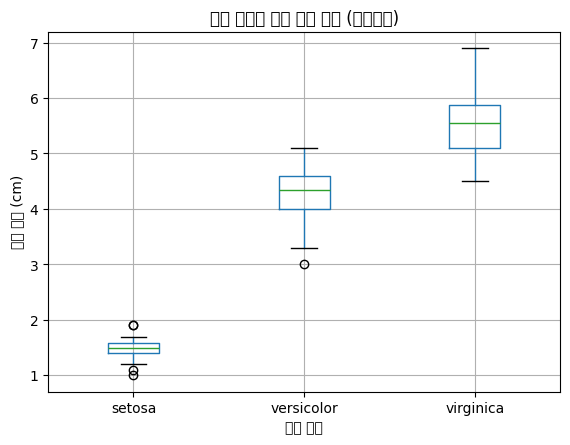

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48531 (\N{HANGUL SYLLABLE BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

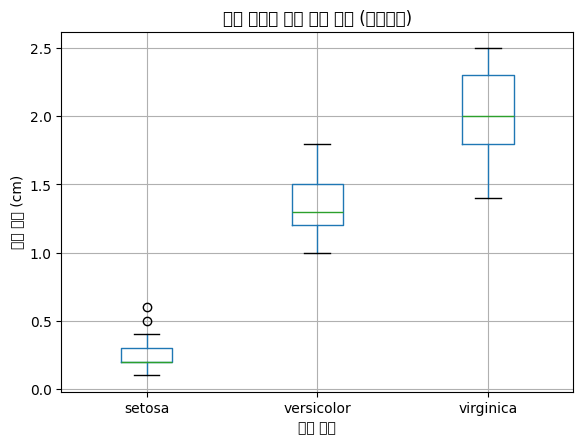

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

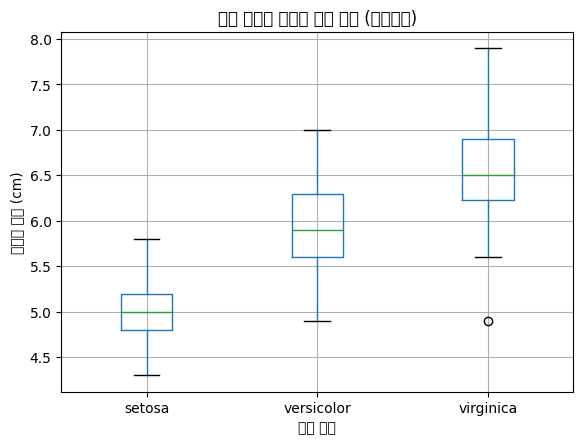

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

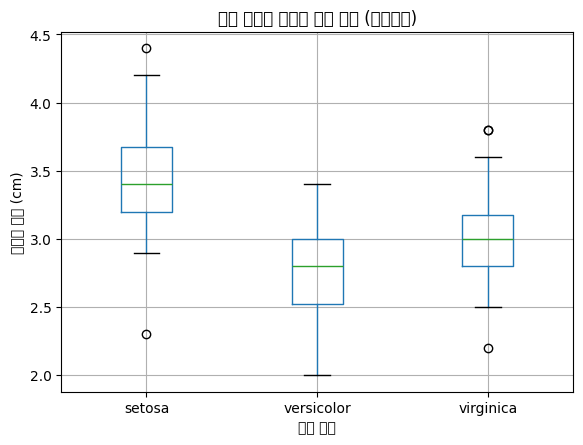


그래프를 보고 다음을 관찰하세요:
- 박스(Box)는 데이터의 중간 50% 범위(IQR)를 나타냅니다. 박스가 길수록 데이터의 중간 부분이 넓게 퍼져있다는 뜻입니다.
- 박스 안의 선은 중앙값(Median)입니다.
- 박스에서 위아래로 뻗은 선(Whisker)은 이상치가 아닌 데이터의 일반적인 범위를 나타냅니다.
- Whisper 바깥에 점으로 표시된 데이터는 이상치(Outlier)일 가능성이 있는 값입니다.

각 그래프에서 박스의 길이와 점으로 표시된 이상치를 찾아보세요.


In [21]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 그래프를 그리기 위한 matplotlib.pyplot 라이브러리 불러오기
# 보통 plt라는 별명으로 사용합니다.
import matplotlib.pyplot as plt

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 14: 박스플롯으로 분포 비교하기

# 각 측정값(열)별로 붓꽃 종류별 박스플롯을 그립니다.

# 'petal length (cm)' (꽃잎 길이) 종류별 박스플롯
plt.figure(figsize=(8, 6)) # 그래프 크기 설정
# 박스플롯은 특정 열을 y축 데이터로, 다른 열(범주형)을 그룹 기준으로 그립니다.
붓꽃_df.boxplot(column='petal length (cm)', by='종류')

plt.title('붓꽃 종류별 꽃잎 길이 분포 (박스플롯)')
plt.suptitle('') # boxplot by 옵션 사용 시 자동으로 생기는 상위 제목 제거
plt.xlabel('붓꽃 종류')
plt.ylabel('꽃잎 길이 (cm)')
plt.show()


# 'petal width (cm)' (꽃잎 너비) 종류별 박스플롯
plt.figure(figsize=(8, 6))
붓꽃_df.boxplot(column='petal width (cm)', by='종류')

plt.title('붓꽃 종류별 꽃잎 너비 분포 (박스플롯)')
plt.suptitle('')
plt.xlabel('붓꽃 종류')
plt.ylabel('꽃잎 너비 (cm)')
plt.show()

# 'sepal length (cm)' (꽃받침 길이) 종류별 박스플롯
plt.figure(figsize=(8, 6))
붓꽃_df.boxplot(column='sepal length (cm)', by='종류')

plt.title('붓꽃 종류별 꽃받침 길이 분포 (박스플롯)')
plt.suptitle('')
plt.xlabel('붓꽃 종류')
plt.ylabel('꽃받침 길이 (cm)')
plt.show()

# 'sepal width (cm)' (꽃받침 너비) 종류별 박스플롯
plt.figure(figsize=(8, 6))
붓꽃_df.boxplot(column='sepal width (cm)', by='종류')

plt.title('붓꽃 종류별 꽃받침 너비 분포 (박스플롯)')
plt.suptitle('')
plt.xlabel('붓꽃 종류')
plt.ylabel('꽃받침 너비 (cm)')
plt.show()


# 그래프를 보고 다음을 관찰하세요:
# - 박스의 길이가 길수록 (IQR 범위가 넓을수록) 데이터의 분포 범위가 넓다는 뜻입니다.
#   어떤 종류의 어떤 측정값 박스가 가장 길어 보이나요?
# - 박스 바깥에 점으로 표시된 데이터가 있나요? 있다면 그것이 이상치입니다.
#   어떤 그래프에 이상치가 나타나나요? 어떤 종류에서 나타나나요?

print("\n그래프를 보고 다음을 관찰하세요:")
print("- 박스(Box)는 데이터의 중간 50% 범위(IQR)를 나타냅니다. 박스가 길수록 데이터의 중간 부분이 넓게 퍼져있다는 뜻입니다.")
print("- 박스 안의 선은 중앙값(Median)입니다.")
print("- 박스에서 위아래로 뻗은 선(Whisker)은 이상치가 아닌 데이터의 일반적인 범위를 나타냅니다.")
print("- Whisper 바깥에 점으로 표시된 데이터는 이상치(Outlier)일 가능성이 있는 값입니다.")
print("\n각 그래프에서 박스의 길이와 점으로 표시된 이상치를 찾아보세요.")

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48531 (\N{HANGUL SYLLABLE BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

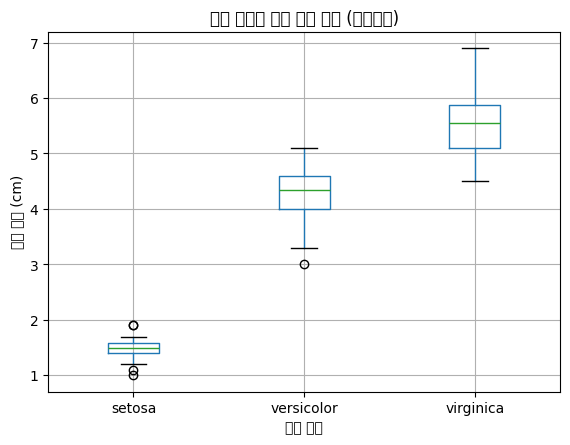

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48531 (\N{HANGUL SYLLABLE BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

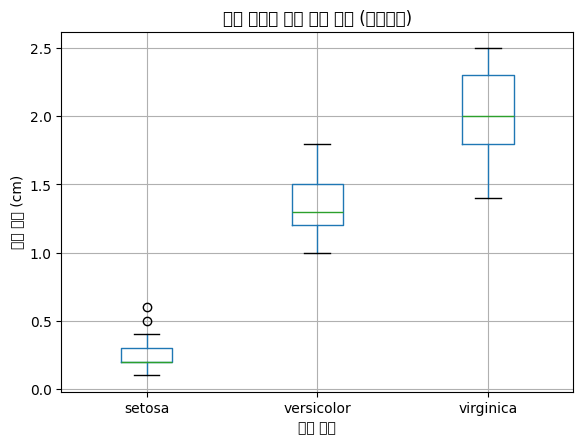

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

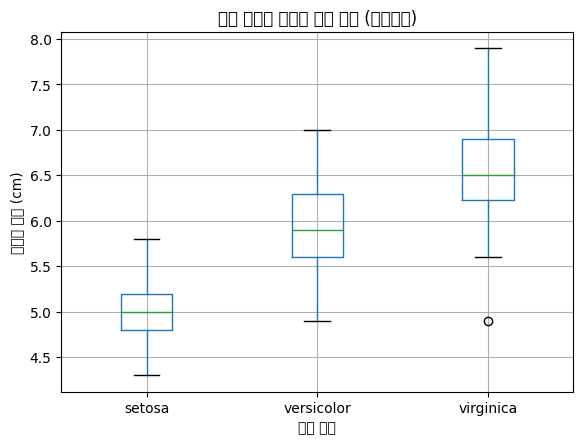

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

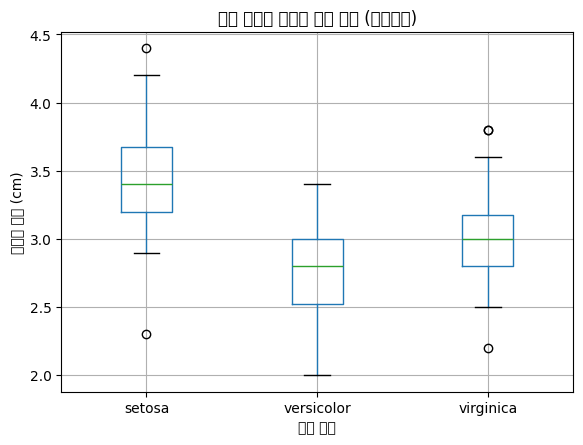


그래프를 보고 다음을 관찰하세요:
- 박스(Box)는 데이터의 중간 50% 범위(IQR)를 나타냅니다. 박스가 길수록 데이터의 중간 부분이 넓게 퍼져있다는 뜻입니다.
- 박스 안의 선은 중앙값(Median)입니다.
- 박스에서 위아래로 뻗은 선(Whisker)은 이상치가 아닌 데이터의 일반적인 범위를 나타냅니다.
- Whisper 바깥에 점으로 표시된 데이터는 이상치(Outlier)일 가능성이 있는 값입니다.

각 그래프에서 박스의 길이와 점으로 표시된 이상치를 찾아보세요.


In [22]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 그래프를 그리기 위한 matplotlib.pyplot 라이브러리 불러오기
# 보통 plt라는 별명으로 사용합니다.
import matplotlib.pyplot as plt

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 14: 박스플롯으로 분포 비교하기

# 각 측정값(열)별로 붓꽃 종류별 박스플롯을 그립니다.

# 'petal length (cm)' (꽃잎 길이) 종류별 박스플롯
plt.figure(figsize=(8, 6)) # 그래프 크기 설정
# 박스플롯은 특정 열을 y축 데이터로, 다른 열(범주형)을 그룹 기준으로 그립니다.
붓꽃_df.boxplot(column='petal length (cm)', by='종류')

plt.title('붓꽃 종류별 꽃잎 길이 분포 (박스플롯)')
plt.suptitle('') # boxplot by 옵션 사용 시 자동으로 생기는 상위 제목 제거
plt.xlabel('붓꽃 종류')
plt.ylabel('꽃잎 길이 (cm)')
plt.show()


# 'petal width (cm)' (꽃잎 너비) 종류별 박스플롯
plt.figure(figsize=(8, 6))
붓꽃_df.boxplot(column='petal width (cm)', by='종류')

plt.title('붓꽃 종류별 꽃잎 너비 분포 (박스플롯)')
plt.suptitle('')
plt.xlabel('붓꽃 종류')
plt.ylabel('꽃잎 너비 (cm)')
plt.show()

# 'sepal length (cm)' (꽃받침 길이) 종류별 박스플롯
plt.figure(figsize=(8, 6))
붓꽃_df.boxplot(column='sepal length (cm)', by='종류')

plt.title('붓꽃 종류별 꽃받침 길이 분포 (박스플롯)')
plt.suptitle('')
plt.xlabel('붓꽃 종류')
plt.ylabel('꽃받침 길이 (cm)')
plt.show()

# 'sepal width (cm)' (꽃받침 너비) 종류별 박스플롯
plt.figure(figsize=(8, 6))
붓꽃_df.boxplot(column='sepal width (cm)', by='종류')

plt.title('붓꽃 종류별 꽃받침 너비 분포 (박스플롯)')
plt.suptitle('')
plt.xlabel('붓꽃 종류')
plt.ylabel('꽃받침 너비 (cm)')
plt.show()


# 그래프를 보고 다음을 관찰하세요:
# - 박스의 길이가 길수록 (IQR 범위가 넓을수록) 데이터의 분포 범위가 넓다는 뜻입니다.
#   어떤 종류의 어떤 측정값 박스가 가장 길어 보이나요?
# - 박스 바깥에 점으로 표시된 데이터가 있나요? 있다면 그것이 이상치입니다.
#   어떤 그래프에 이상치가 나타나나요? 어떤 종류에서 나타나나요?

print("\n그래프를 보고 다음을 관찰하세요:")
print("- 박스(Box)는 데이터의 중간 50% 범위(IQR)를 나타냅니다. 박스가 길수록 데이터의 중간 부분이 넓게 퍼져있다는 뜻입니다.")
print("- 박스 안의 선은 중앙값(Median)입니다.")
print("- 박스에서 위아래로 뻗은 선(Whisker)은 이상치가 아닌 데이터의 일반적인 범위를 나타냅니다.")
print("- Whisper 바깥에 점으로 표시된 데이터는 이상치(Outlier)일 가능성이 있는 값입니다.")
print("\n각 그래프에서 박스의 길이와 점으로 표시된 이상치를 찾아보세요.")

In [24]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 15: 새로운 값 계산하기

# '꽃받침 면적 (cm^2)' 열 새로 만들기
# 꽃받침 길이 * 꽃받침 너비
붓꽃_df['꽃받침 면적 (cm^2)'] = 붓꽃_df['sepal length (cm)'] * 붓꽃_df['sepal width (cm)']

# '꽃잎 면적 (cm^2)' 열 새로 만들기
# 꽃잎 길이 * 꽃잎 너비
붓꽃_df['꽃잎 면적 (cm^2)'] = 붓꽃_df['petal length (cm)'] * 붓꽃_df['petal width (cm)']

# 새로운 열이 잘 추가되었는지 확인 (처음 5개 행만 출력)
print("--- 새로운 열 추가 후 데이터프레임 (처음 5개 행) ---")
print(붓꽃_df.head().to_markdown(index=False, numalign="left", stralign="left")) # to_markdown 사용, 인덱스 제거

# 붓꽃 종류별로 데이터를 그룹화합니다.
종류별_그룹 = 붓꽃_df.groupby('종류')

# 그룹별로 새로 계산된 '꽃받침 면적'의 평균을 계산합니다.
종류별_꽃받침_면적_평균 = 종류별_그룹['꽃받침 면적 (cm^2)'].mean()

# 그룹별로 새로 계산된 '꽃잎 면적'의 평균을 계산합니다.
종류별_꽃잎_면적_평균 = 종류별_그룹['꽃잎 면적 (cm^2)'].mean()

# 계산 결과를 표로 정리합니다.
평균_면적_비교_표 = pandas.DataFrame({
    '꽃받침 면적 평균 (cm^2)': 종류별_꽃받침_면적_평균,
    '꽃잎 면적 평균 (cm^2)': 종류별_꽃잎_면적_평균
})

# 표 출력
print("\n--- 붓꽃 종류별 평균 면적 비교 ---")
print(평균_면적_비교_표.to_markdown(numalign="left", stralign="left")) # to_markdown 사용
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 15: 새로운 값 계산하기

# '꽃받침 면적 (cm^2)' 열 새로 만들기
# 꽃받침 길이 * 꽃받침 너비
붓꽃_df['꽃받침 면적 (cm^2)'] = 붓꽃_df['sepal length (cm)'] * 붓꽃_df['sepal width (cm)']

# '꽃잎 면적 (cm^2)' 열 새로 만들기
# 꽃잎 길이 * 꽃잎 너비
붓꽃_df['꽃잎 면적 (cm^2)'] = 붓꽃_df['petal length (cm)'] * 붓꽃_df['petal width (cm)']

# 새로운 열이 잘 추가되었는지 확인 (처음 5개 행만 출력)
print("--- 새로운 열 추가 후 데이터프레임 (처음 5개 행) ---")
print(붓꽃_df.head().to_markdown(index=False, numalign="left", stralign="left")) # to_markdown 사용, 인덱스 제거

# 붓꽃 종류별로 데이터를 그룹화합니다.
종류별_그룹 = 붓꽃_df.groupby('종류')

# 그룹별로 새로 계산된 '꽃받침 면적'의 평균을 계산합니다.
종류별_꽃받침_면적_평균 = 종류별_그룹['꽃받침 면적 (cm^2)'].mean()

# 그룹별로 새로 계산된 '꽃잎 면적'의 평균을 계산합니다.
종류별_꽃잎_면적_평균 = 종류별_그룹['꽃잎 면적 (cm^2)'].mean()

# 계산 결과를 표로 정리합니다.
평균_면적_비교_표 = pandas.DataFrame({
    '꽃받침 면적 평균 (cm^2)': 종류별_꽃받침_면적_평균,
    '꽃잎 면적 평균 (cm^2)': 종류별_꽃잎_면적_평균
})

# 표 출력
print("\n--- 붓꽃 종류별 평균 면적 비교 ---")
print(평균_면적_비교_표.to_markdown(numalign="left", stralign="left")) # to_markdown 사용

# 어떤 종류가 꽃받침 면적이 가장 큰가요?
가장_큰_꽃받침_면적_종류 = 평균_면적_비교_표['꽃받침 면적 평균 (cm^2)'].idxmax()

--- 새로운 열 추가 후 데이터프레임 (처음 5개 행) ---
| sepal length (cm)   | sepal width (cm)   | petal length (cm)   | petal width (cm)   | 종류   | 꽃받침 면적 (cm^2)   | 꽃잎 면적 (cm^2)   |
|:--------------------|:-------------------|:--------------------|:-------------------|:-------|:---------------------|:-------------------|
| 5.1                 | 3.5                | 1.4                 | 0.2                | setosa | 17.85                | 0.28               |
| 4.9                 | 3                  | 1.4                 | 0.2                | setosa | 14.7                 | 0.28               |
| 4.7                 | 3.2                | 1.3                 | 0.2                | setosa | 15.04                | 0.26               |
| 4.6                 | 3.1                | 1.5                 | 0.2                | setosa | 14.26                | 0.3                |
| 5                   | 3.6                | 1.4                 | 0.2                | setosa | 18                   | 0.28     

In [25]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 문제 16: 데이터 필터링

# 조건 1: 꽃받침 너비가 3.0 이상
조건1 = 붓꽃_df['sepal width (cm)'] >= 3.0

# 조건 2: 꽃잎 너비가 1.5 이상
조건2 = 붓꽃_df['petal width (cm)'] >= 1.5

# 두 가지 조건을 모두 만족하는 데이터 필터링
# 각 조건은 소괄호()로 묶고 '&' 기호로 연결합니다.
필터링된_데이터 = 붓꽃_df[조건1 & 조건2]

# 필터링된 데이터의 개수 확인
필터링된_개수 = len(필터링된_데이터)
print(f"꽃받침 너비가 3.0 이상이고 꽃잎 너비가 1.5 이상인 데이터 개수: {필터링된_개수}개")

# 필터링된 데이터 자체를 출력 (처음 10개 행)
print("\n--- 필터링된 데이터 (처음 10개 행) ---")
if 필터링된_개수 > 0:
    print(필터링된_데이터.head(10).to_markdown(index=False, numalign="left", stralign="left")) # to_markdown 사용, 인덱스 제거
else:
    print("조건을 만족하는 데이터가 없습니다.")

# 필터링된 데이터들이 주로 어떤 종류인지 확인
# 필터링된 데이터의 '종류' 열에서 각 종류별 개수를 셉니다.
print("\n--- 필터링된 데이터의 종류별 개수 ---")
if 필터링된_개수 > 0:
    종류별_개수_필터링됨 = 필터링된_데이터['종류'].value_counts()
    print(종류별_개수_필터링됨)
else:
    print("조건을 만족하는 데이터가 없어 종류별 개수를 셀 수 없습니다.")

# 주로 어떤 종류인지 결론 내리기
if 필터링된_개수 > 0:
    주요_종류 = 종류별_개수_필터링됨.idxmax() # 개수가 가장 많은 종류의 이름
    print(f"\n이 조건에 해당하는 데이터는 주로 '{주요_종류}' 종류인 것으로 보입니다.")
else:
     print("\n조건을 만족하는 데이터가 없습니다.")

꽃받침 너비가 3.0 이상이고 꽃잎 너비가 1.5 이상인 데이터 개수: 39개

--- 필터링된 데이터 (처음 10개 행) ---
| sepal length (cm)   | sepal width (cm)   | petal length (cm)   | petal width (cm)   | 종류       |
|:--------------------|:-------------------|:--------------------|:-------------------|:-----------|
| 6.4                 | 3.2                | 4.5                 | 1.5                | versicolor |
| 6.9                 | 3.1                | 4.9                 | 1.5                | versicolor |
| 6.3                 | 3.3                | 4.7                 | 1.6                | versicolor |
| 5.9                 | 3                  | 4.2                 | 1.5                | versicolor |
| 5.6                 | 3                  | 4.5                 | 1.5                | versicolor |
| 5.9                 | 3.2                | 4.8                 | 1.8                | versicolor |
| 6.7                 | 3                  | 5                   | 1.7                | versicolor |
| 5.4               

In [28]:
# 데이터를 다루기 위한 pandas 라이브러리 불러오기
import pandas

# 그래프를 그리기 위한 matplotlib.pyplot 라이브러리 불러오기
# 보통 plt라는 별명으로 사용합니다.
import matplotlib.pyplot as plt

# 붓꽃 데이터를 가져오기 위한 scikit-learn 라이브러리 불러오기
# 만약 이 라이브러리가 설치되어 있지 않다면 아래 명령어를 실행해주세요.
# !pip install scikit-learn
from sklearn.datasets import load_iris

# scikit-learn에서 붓꽃 데이터 불러오기
붓꽃데이터_원래형태 = load_iris()

# 불러온 붓꽃 데이터를 pandas 데이터프레임 형태로 만들기
붓꽃_df = pandas.DataFrame(data=붓꽃데이터_원래형태.data, columns=붓꽃데이터_원래형태.feature_names)

# 붓꽃의 종류 정보('species')를 데이터프레임에 추가하기
붓꽃_df['종류'] = 붓꽃데이터_원래형태.target
붓꽃_df['종류'] = 붓꽃_df['종류'].map(lambda x: 붓꽃데이터_원래형태.target_names[x])

#-----------------------------------------------------------
# 새로운 문제: 데이터 순위 매기기 (예: 꽃잎 길이 기준)

# 'petal length (cm)' (꽃잎 길이) 기준으로 데이터를 내림차순 정렬합니다.
# ascending=False는 큰 값부터 작은 값 순서로 정렬하라는 뜻입니다.
정렬된_데이터 = 붓꽃_df.sort_values(by='petal length (cm)', ascending=False)

# 정렬된 데이터의 처음 10개 (Top 10)만 선택합니다.
top_10_데이터 = 정렬된_데이터.head(10)

print("--- 꽃잎 길이 기준 Top 10 데이터 (처음 10개 행) ---")
# 인덱스는 정렬 후 원래 순서가 뒤섞이므로 False로 설정
print(top_10_데이터.to_markdown(index=False, numalign="left", stralign="left")) # tabulate 필요

# Top 10 데이터에 포함된 붓꽃 종류별 개수를 셉니다.
top_10_종류별_개수 = top_10_데이터['종류'].value_counts()

print("\n--- Top 10 데이터의 종류별 개수 ---")
print(top_10_종류별_개수)

# Top 10에 가장 많이 포함된 종류와 가장 적게 포함된 종류를 찾습니다.
# idxmax()는 개수가 가장 많은 종류 이름을 반환합니다.
가장_많은_종류_top10 = top_10_종류별_개수.idxmax()

# idxmin()는 개수가 가장 적은 종류 이름을 반환합니다.
# 만약 value_counts() 결과에 없는 종류가 있다면 (개수 0), idxmin()은 작동하지 않을 수 있습니다.
# 여기서는 Top 10에 포함된 종류 중에서 가장 적게 포함된 종류를 찾습니다.
# 만약 모든 종류가 1개 이상 있다면 idxmin() 사용 가능.
# 만약 특정 종류가 하나도 없다면 (value_counts 결과에 아예 없으면), 해당 종류는 '가장 적게 포함된 종류'로 명확히 말하기 어렵습니다.
# 여기서는 value_counts 결과에 나타난 종류 중에서 가장 개수가 적은 것을 찾겠습니다.
if len(top_10_종류별_개수) > 0:
    # 다음 두 줄은 if 블록에 속하므로 들여쓰기가 필요합니다.
    가장_적은_종류_top10 = top_10_종류별_개수.idxmin()
    print(f"\n꽃잎 길이 기준 Top 10에 가장 많이 포함된 종류는 '{가장_많은_종류_top10}' 입니다.")
    print(f"Top 10에 가장 적게 포함된 종류는 '{가장_적은_종류_top10}' 입니다.")
else:
    print("\nTop 10 데이터에 포함된 종류가 없습니다.")

--- 꽃잎 길이 기준 Top 10 데이터 (처음 10개 행) ---
| sepal length (cm)   | sepal width (cm)   | petal length (cm)   | petal width (cm)   | 종류      |
|:--------------------|:-------------------|:--------------------|:-------------------|:----------|
| 7.7                 | 2.6                | 6.9                 | 2.3                | virginica |
| 7.7                 | 3.8                | 6.7                 | 2.2                | virginica |
| 7.7                 | 2.8                | 6.7                 | 2                  | virginica |
| 7.6                 | 3                  | 6.6                 | 2.1                | virginica |
| 7.9                 | 3.8                | 6.4                 | 2                  | virginica |
| 7.3                 | 2.9                | 6.3                 | 1.8                | virginica |
| 7.4                 | 2.8                | 6.1                 | 1.9                | virginica |
| 7.2                 | 3.6                | 6.1               